<a href="https://colab.research.google.com/github/OlanrewajuDatanalyst/Regression-and-Correlation-Analysis-Using-Python-Libraries/blob/main/Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6) # Adjusts the configuration of the plot we will create


# Read in the data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/MOVIES INDUSTRY/movies.csv')

# Quick glimpes at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Finding if there are missing values, and check the count, unique, data_types

output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype'])

for col in df:
    output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype]

output_df

,Count,Missing,Unique,Dtype
name,7668,0,7512,object
rating,7591,77,12,object
genre,7668,0,19,object
year,7668,0,41,int64
released,7666,2,3414,object
score,7665,3,72,float64
votes,7665,3,936,float64
director,7668,0,2949,object
writer,7665,3,4535,object
star,7667,1,2814,object


In [8]:
# Imputing the missing values with a measure of central tendency

from sklearn.impute import SimpleImputer

# Create an imputer object with strategy as a mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the gross column and transform the missing values
df['gross'] = imputer.fit_transform(df[['gross']])
df['score'] = imputer.fit_transform(df[['score']])
df['votes'] = imputer.fit_transform(df[['votes']])

In [9]:
df['gross'].isnull().sum()
df['score'].isnull().sum()

0

In [11]:
# Predicting the missing columns for budget

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Split data into features (X) - gross, score, votes and label (y) - 'budget'
X = df[['gross', 'score', 'votes']]
y = df['budget']

# Remove rows where 'budget' is NaN for the purpose of training the model
train_data = df.dropna(subset=['budget'])

# Redefine X_train and y_train from this clean dataset
X_train = train_data[['gross', 'score', 'votes']]
y_train = train_data['budget']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
# Ensure to use the original X (features) where 'budget' is missing for predictions
missing_data_indices = df['budget'].isnull()
predicted_values = model.predict(df.loc[missing_data_indices, ['gross', 'score', 'votes']])

# Replace missing values with predicted values in the original dataframe
df.loc[missing_data_indices, 'budget'] = predicted_values

In [12]:
df['budget'].isnull().sum()

0

In [13]:
# Remove rows with missing values with data types objects

df = df.dropna()

In [14]:
# Change data types of columns

df['budget'] = df['budget'].astype('int64')

In [15]:
df['gross'] = df['gross'].astype('int64')

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [17]:
# Sorting the gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
# Drop any duplicates

df = df.drop_duplicates()

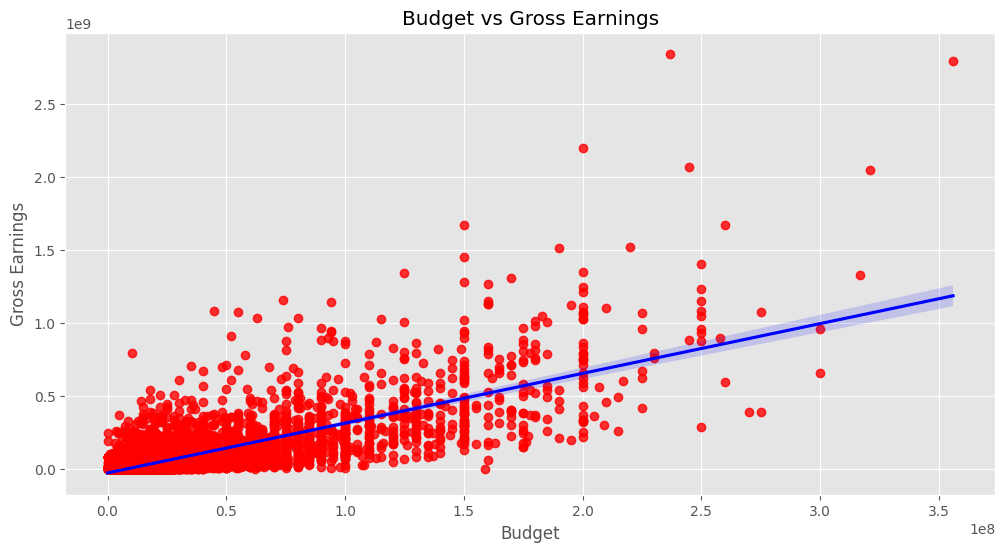

In [20]:
# Correlation between Budget and Gross Earnings

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

In [21]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.102325,0.226847,0.288765,0.254213,0.120819
score,0.102325,1.000000,0.411931,0.031933,0.185063,0.400560
votes,0.226847,0.411931,1.000000,0.460762,0.629322,0.309355
budget,0.288765,0.031933,0.460762,1.000000,0.750993,0.263783
gross,0.254213,0.185063,0.629322,0.750993,1.000000,0.241619
runtime,0.120819,0.400560,0.309355,0.263783,0.241619,1.000000


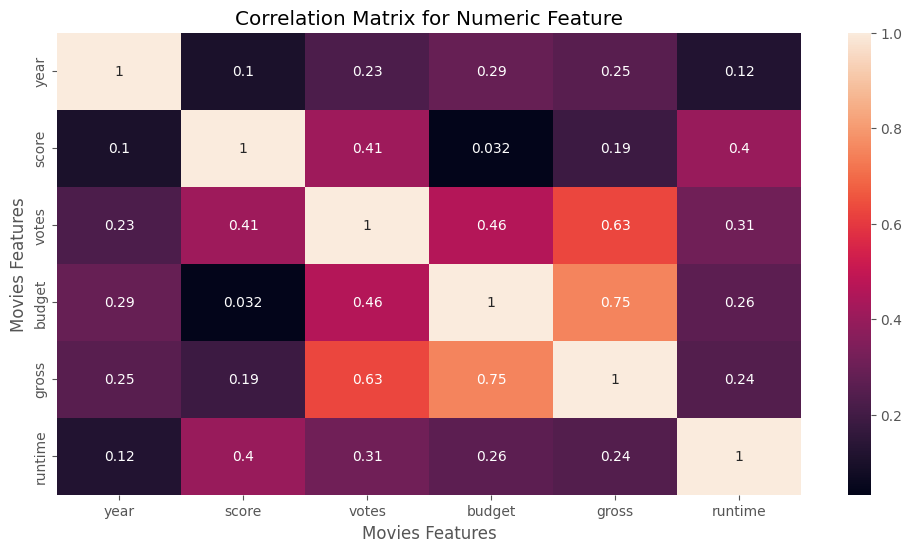

In [22]:
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Feature')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

plt.show()

There's a relatively strong correlation (0.75) between the budget of a movie and its gross revenue which might suggest that investment in production quality or marketing could be correlated with revenue in the music industry.

Furthermore, the correlation between "votes" (which could indicate audience engagement or popularity) and gross revenue is relatively high (0.63). Similarly, the correlation between "votes" and "score" (possibly critic or audience ratings) is also significant (0.41). In the music industry, engagement metrics such as streaming numbers, likes, shares, or ratings could correlate with revenue.

In [23]:
df_num = df

for col_name in df_num.columns:
    if df_num[col_name].dtype == 'object':
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1757,2284,55,237000000,2847246203,2209,162.0
7445,529,5,0,2019,180,8.4,903000.0,160,730,2193,55,356000000,2797501328,1572,181.0
3045,6812,5,6,1997,696,7.8,1100000.0,1137,1757,1560,55,200000000,2201647264,2209,194.0
6663,5076,5,0,2015,690,7.8,876000.0,1107,2519,508,55,245000000,2069521700,1506,138.0
7244,530,5,0,2018,189,8.4,897000.0,160,730,2193,55,321000000,2048359754,1572,149.0


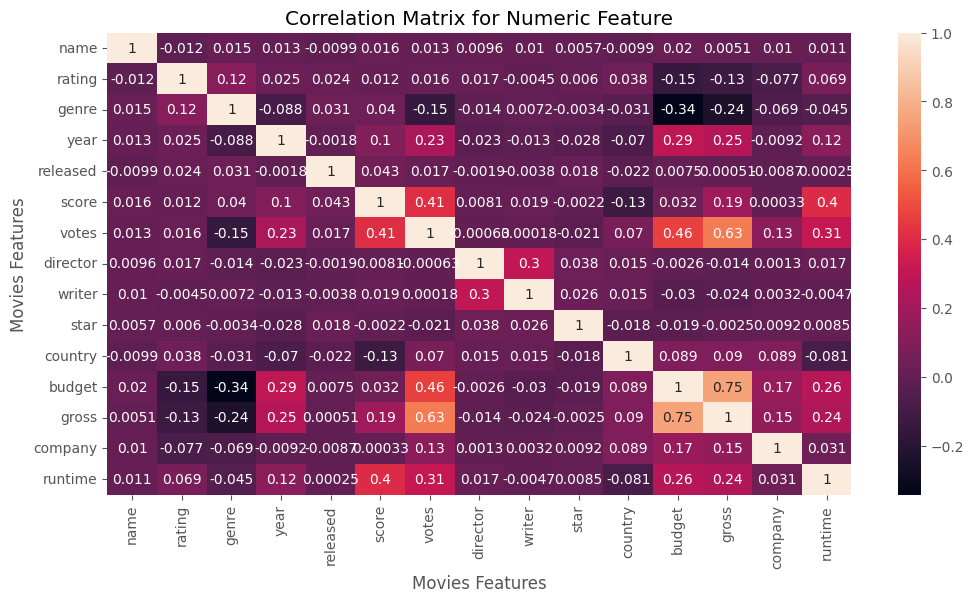

In [24]:
correlation_matrix = df_num.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Feature')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

plt.show()

In [25]:
correlation_mat = df_num.corr()

correlation_unstack = correlation_mat.unstack()

In [26]:
filtered_pairs = [(key, value) for key, value in correlation_unstack.items() if value > 0.5 and value < 1.0]

filtered_pairs

[(('votes', 'gross'), 0.6293216980161638),
 (('budget', 'gross'), 0.7509929260350928),
 (('gross', 'votes'), 0.6293216980161638),
 (('gross', 'budget'), 0.7509929260350928)]

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1102.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:15:25   Log-Likelihood:            -1.4984e+05
No. Observations:                7575   AIC:                         2.997e+05
Df Residuals:                    7560   BIC:                         2.998e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
name        -980.4247    507.555     -1.932      0.0

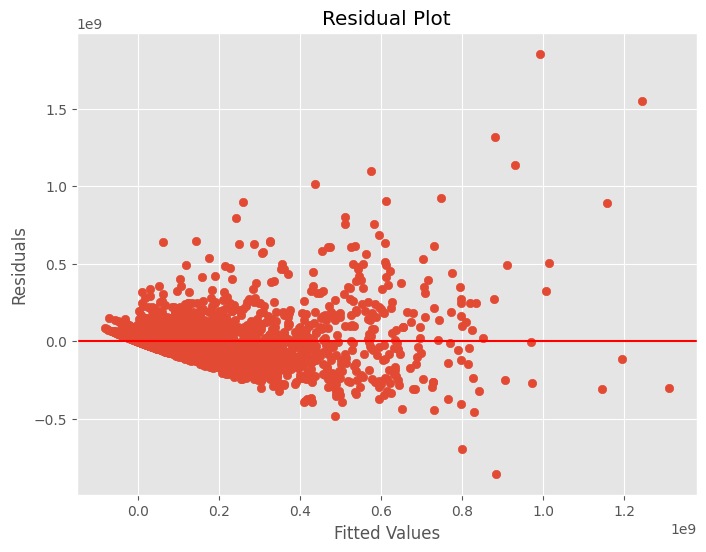

In [27]:
from scipy import stats

#label = 'budget'

y = df.gross
x = df.drop(columns=['gross']).assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

 Among the significant variables, "votes" (indicating the number of votes or possibly audience engagement), "budget" (the amount of money invested in the movie), and "score" (possibly referring to the movie's rating or critic score) have strong impacts, as evidenced by their large coefficient magnitudes on the gross earnings.